# Investment Value

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [9]:
# Set current amount of shares data
# YOUR CODE HERE!
shares = {
    'shares' : [200,320] }
# Set the tickers
tickers = ['MSFT','AAPL']

# Create the shares DataFrame
# YOUR CODE HERE!
shares = pd.DataFrame(shares, index=tickers)
# Display shares data
# YOUR CODE HERE!
shares

,shares
MSFT,200
AAPL,320


In [11]:
# Load .env environment variables
load_dotenv()

True

In [12]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
secret_key = os.getenv("ALPACA_SECRET_KEY")

In [13]:
# Verify that Alpaca key and secret were correctly loaded
print(type(api_key))
print(type(secret_key))

<class 'str'>
<class 'str'>


In [14]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    secret_key,
    api_version="v2")

In [83]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-11", tz="America/New_York").isoformat()

In [84]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [85]:
# Get current price data for MSFT and AAPL
df_current_price = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Display sample data
df_current_price

AAPL                                     MSFT  \
                             open    high    low   close    volume    open   
time                                                                         
2021-01-11 00:00:00-05:00  129.19  130.17  128.5  128.98  84845947  218.47   

                                                            
                             high     low  close    volume  
time                                                        
2021-01-11 00:00:00-05:00  218.91  216.73  217.5  15604905

## Calculate the current value in dollars of the stock portfolio

In [86]:
# Fetch the current closing prices from the DataFrame
AAPL_curr = float(df_current_price['AAPL']['close'][0])
MSFT_curr = float(df_current_price['MSFT']['close'][0])


In [87]:
# Compute the current value in dollars of the stock portfolio
AAPL_val = AAPL_curr * shares.loc["AAPL"]["shares"]
MSFT_val = MSFT_curr * shares.loc["MSFT"]["shares"]
# Print the current value of the stocks portfolio
print(AAPL_val)
print(MSFT_val)

41273.6
43500.0


## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [88]:
# Set the data for the shares value DataFrame
share_value = {
    "MSFT": [MSFT_val],
    "AAPL": [AAPL_val]
}


# Create a DataFrame with the current value of shares
share_df = pd.DataFrame(share_value)

# Display DataFrame data
share_df

,MSFT,AAPL
0,43500.0,41273.6


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='shares'>

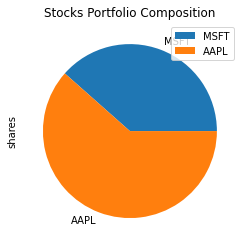

In [89]:
# Create a pie chart to show the proportion of stocks in the portfolio
shares.plot.pie(y="shares", title="Stocks Portfolio Composition")

<AxesSubplot:title={'center':'Current Value in Dollars of Stock Portfolio'}>

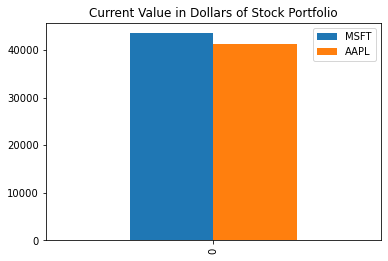

In [90]:
# Create a bar plot to show the value of shares
share_df.plot.bar(title="Current Value in Dollars of Stock Portfolio")